# 3.Models_1st_classification

### 1. import packages

In [62]:
from itertools import cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from pandas_ml import ConfusionMatrix

## Run models WITHOUT relational information

In [70]:
data = pd.read_csv('./building_drop_duplicates.csv')
X = data.drop(['types', 'bat_ids', 'global_ids', 'building'], 1)
Y = data['types']

### 2-1. Naive Bayes Classifier

In [8]:
clf = GaussianNB()
scores = cross_val_score(clf, X, Y, cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6615 (+/- 0.2467)


### 2-2. Logistic Regression

In [11]:
clf = LogisticRegression(multi_class='ovr')
scores = cross_val_score(clf, X, Y, cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8063 (+/- 0.0861)


### 2-3. SVM

In [71]:
Y = [(0 if i=='IfcWallStandardCase' else (1 if i=='IfcBeam' else(2 if i=='IfcCovering' else (3 if i=='IfcColumn' else(4 if i=='IfcSlab' else(5 if i=='IfcDoor' else(6 if i=='IfcWindow' else 7))))))) for i in Y]
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = Y.shape[1]
random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

clf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=random_state, C=1, gamma=0.1))
clf.fit(X_train, y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)

print ("Accuracy: %0.4f" % clf.score(X_test, y_test)) 

Accuracy: 0.9084


## Run models WITH relational information¶

In [75]:
data = pd.read_csv('./building_rel_drop_duplicates.csv')
X = data.drop(['types', 'bat_ids', 'global_ids', 'building'], 1)
Y = data['types']

### 3-1. Naive Bayes Classifier

In [19]:
clf = GaussianNB()
scores = cross_val_score(clf, X, Y, cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8309 (+/- 0.1650)


### 3-2. Logistic Regression

In [20]:
clf = LogisticRegression(multi_class='ovr')
scores = cross_val_score(clf, X, Y, cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8997 (+/- 0.0638)


### 3-3. SVM

In [65]:
random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

clf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=random_state, C=10, gamma=0.1))
clf.fit(X_train, y_train)

print ("Accuracy: %0.4f" % clf.score(X_test, y_test)) 

Accuracy: 0.9475


### 3-3-1. Precision, Recall, F1-score

In [66]:
y_pred = clf.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

            IfcBeam       0.98      0.95      0.96        83
          IfcColumn       1.00      0.96      0.98        55
        IfcCovering       1.00      0.82      0.90        60
            IfcDoor       0.93      0.82      0.87        17
         IfcRailing       1.00      1.00      1.00         6
            IfcSlab       1.00      0.58      0.73        45
IfcWallStandardCase       0.93      1.00      0.96       565
          IfcWindow       1.00      0.43      0.60         7

        avg / total       0.95      0.95      0.94       838



### 3-3-2. Confusion matrix

In [68]:
cm = ConfusionMatrix(np.array(y_test), y_pred)
cm

Predicted            IfcBeam  IfcColumn  IfcCovering  IfcDoor  IfcRailing  \
Actual                                                                      
IfcBeam                   79          0            0        0           0   
IfcColumn                  0         53            0        0           0   
IfcCovering                0          0           49        0           0   
IfcDoor                    0          0            0       14           0   
IfcRailing                 0          0            0        0           6   
IfcSlab                    1          0            0        0           0   
IfcWallStandardCase        1          0            0        0           0   
IfcWindow                  0          0            0        1           0   
__all__                   81         53           49       15           6   

Predicted            IfcSlab  IfcWallStandardCase  IfcWindow  __all__  
Actual                                                                 
IfcBeam 

### 3-3-3. Precison-recall curve

In [76]:
Y = [(0 if i=='IfcWallStandardCase' else (1 if i=='IfcBeam' else(2 if i=='IfcCovering' else (3 if i=='IfcColumn' else(4 if i=='IfcSlab' else(5 if i=='IfcDoor' else(6 if i=='IfcWindow' else 7))))))) for i in Y]
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = Y.shape[1]
random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

clf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=random_state, C=10, gamma=0.1))
clf.fit(X_train, y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)
print ("Accuracy: %0.4f" % clf.score(X_test, y_test)) 

Accuracy: 0.9427


Average precision score, micro-averaged over all classes: 0.99


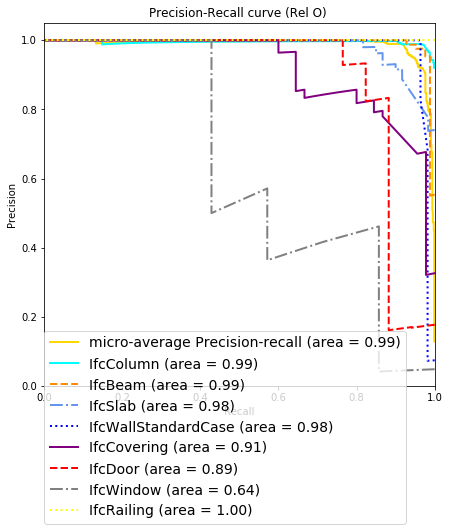

In [77]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

linestyles = cycle(['-', '--', '-.', ':'])
colors = ['aqua', 'darkorange', 'cornflowerblue', 'blue', 'purple', 'red', 'grey', 'yellow']
classes = ['IfcColumn', 'IfcBeam', 'IfcSlab', 'IfcWallStandardCase', 'IfcCovering', 'IfcDoor', 'IfcWindow', 'IfcRailing']

for i, line in zip(range(n_classes), linestyles):
    l, = plt.plot(recall[i], precision[i], color=colors[i], linestyle=line, lw=2)
    lines.append(l)
    labels.append('{0} (area = {1:0.2f})'
                  ''.format(classes[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Rel O) ')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()

### 3-3-4. ROU curve

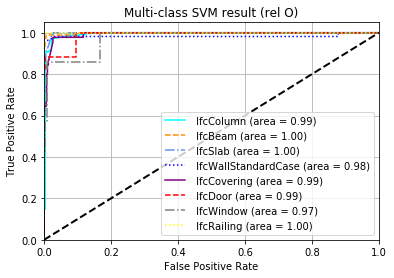

In [78]:
# Compute ROC curve and ROC area for each class
n_classes = 8
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

classes = ['IfcColumn', 'IfcBeam', 'IfcSlab', 'IfcWallStandardCase', 'IfcCovering', 'IfcDoor', 'IfcWindow', 'IfcRailing']
linestyles = cycle(['-', '--', '-.', ':'])
colors = ['aqua', 'darkorange', 'cornflowerblue', 'blue', 'purple', 'red', 'grey', 'yellow']
for i, line in zip(range(n_classes), linestyles):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=line,
             label=' {0} (area = {1:0.2f})'
                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class SVM result (rel O)')
plt.legend(loc="lower right")
plt.grid()
plt.show()